    #Name:  Grace Jenifer J                                  Student Number:N0164406 Title: Time Series_Forecasting

# Using FaceBook Prophet to Predict Future Prices

# Part #1: Project OVERVIEW 

![image.png](images/1.png)

# IMPORT LIBRARIES AND DATASET

### You must install fbprophet package alongside all other necessary apps. First, ensure you using Python 3.74 

In [7]:
# import libraries 
!pip install prophet
!pip install pystan==2.19.1.1


import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/16.2 MB 5.0 MB/s eta 0:00:04
     - -------------------------------------- 0.4/16.2 MB 5.3 MB/s eta 0:00:03
     - -------------------------------------- 0.6/16.2 MB 4.6 MB/s eta 0:00:04
     -- ------------------------------------- 0.9/16.2 MB 4.9 MB/s eta 0:00:04
     -- ------------------------------------- 1.0/16.2 MB 5.4 MB/s eta 0:00:03
     -- ------------------------------------- 1.0/16.2 MB 5.4 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/16.2 MB 4.2 MB/s eta 0:00:04
     --- ------------------------------------ 1.5/16.2 MB 4.1 MB/s eta 0:00:04
     ---- ----------------------------------- 1.8/16.2 MB 4.3 MB/s eta 0:00:04
     ---- ----------------------------------- 1.8/16.2 MB 4.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.8/16.2 MB 4.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.9/16.2 MB 3

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ryhan\AppData\Local\Temp\pip-install-vwr4n1y_\pystan_9d5cc1c0e0464b578f78723af28f47e2\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
# Load the dataset
avocado_df = pd.read_csv('avocado.csv')

# Drop the unnecessary index column if present
avocado_df.drop('Unnamed: 0', axis=1, inplace=True)

# Convert the 'Date' column to datetime format
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

# Rename columns for Prophet compatibility
prophet_df = avocado_df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})



- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [10]:
# Let's view the head of the training dataset as shown below
prophet_df.head()


,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
# Let's view the last elements in the training dataset as shown below
prophet_df.tail()


,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [12]:
# display the simple statistics summary as shown below
prophet_df.describe()


,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [13]:
# Display the basic information as shown below
prophet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            18249 non-null  datetime64[ns]
 1   y             18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [14]:
# Find all null values in each column/field as shown below
null_values = prophet_df.isnull().sum()
null_values


ds              0
y               0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# EXPLORE DATASET  

In [15]:
avocado_df = avocado_df.sort_values('Date')

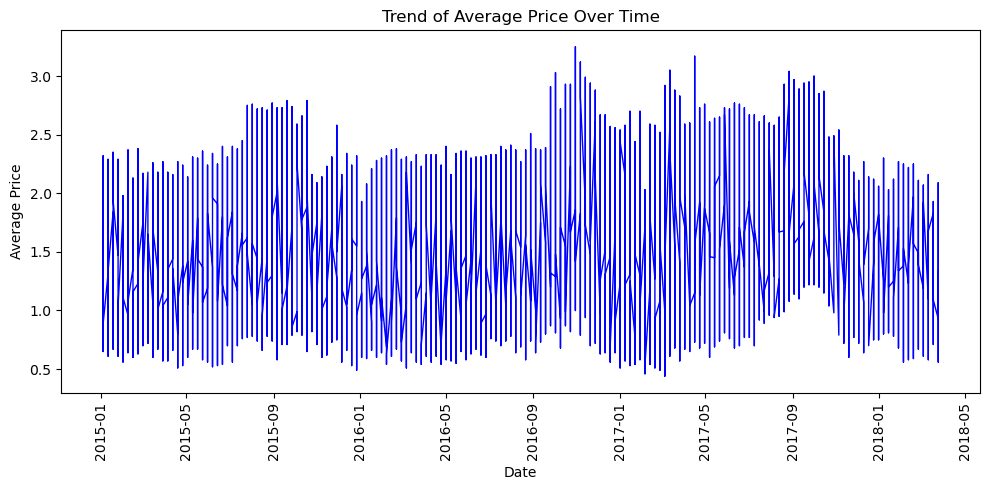

In [21]:
# Plot date and average price shown below

# Sort data just in case
prophet_df.sort_values('ds', inplace=True)

# Plotting the Date against the Average Price as a dense line chart
plt.figure(figsize=(10, 5))  # Adjust the figure size to match your desired output
plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', linewidth=1)  # Adjust linewidth for the desired density
plt.title('Trend of Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Rotate date labels if they overlap
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust the layout to ensure everything fits without overlapping
plt.show()





C:\Users\ryhan\AppData\Local\Temp\ipykernel_47484\1561672660.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado_df['AveragePrice'])


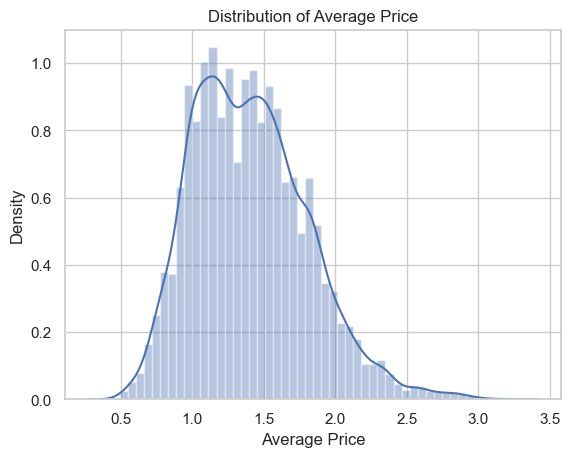

In [24]:
# Display distPlot distribution of the average price as shown below
import seaborn as sns

# Create the distribution plot with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(avocado_df['AveragePrice'], kde=True, bins=30, color="blue", stat="density")

# Overlay the KDE line with a black line
sns.kdeplot(avocado_df['AveragePrice'], color="black", linewidth=2)

# Adding labels and title
plt.xlabel('Average Price')
plt.title('Distribution of Average Price')

# Displaying the plot
plt.show()

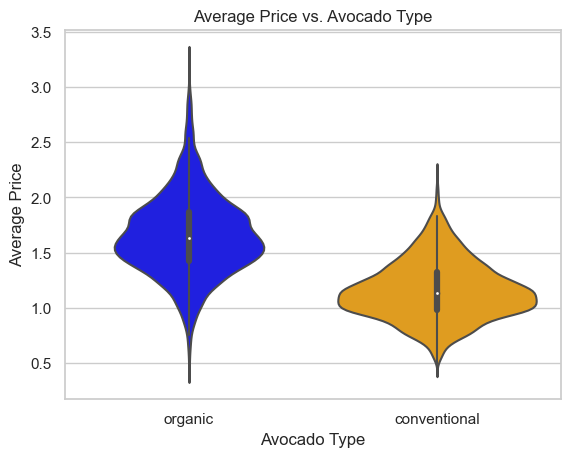

In [25]:
# Plot a violin plot of the average price vs. avocado type as shown below

custom_palette = {'conventional': 'orange', 'organic': 'blue'}

# Plotting a violin plot of the average price vs. avocado type
sns.violinplot(x='type', y='AveragePrice', data=avocado_df, palette=custom_palette)

# Adding labels and title
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')
plt.title('Average Price vs. Avocado Type')

# Displaying the plot
plt.show()

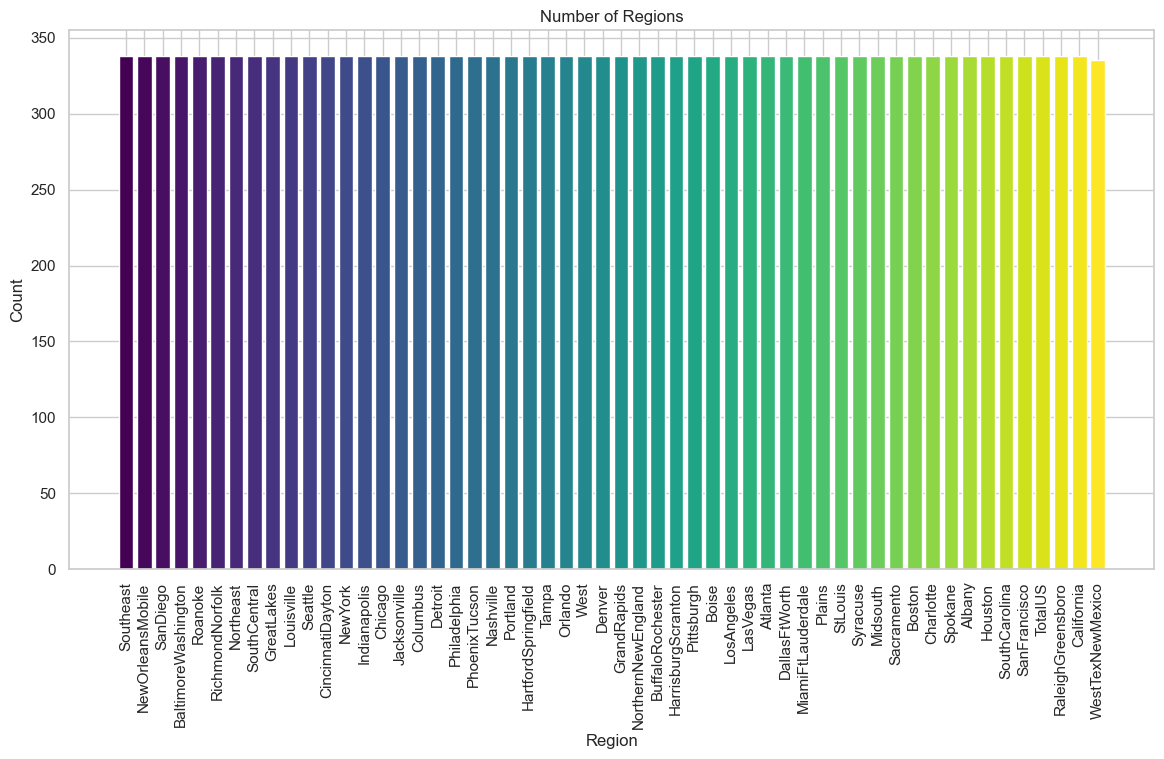

In [27]:
# Display a Bar Chart to indicate the number of regions as shown below

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'avocado_df' is your DataFrame and 'region' is the column of interest.

# Calculate the count of entries for each region
region_counts = avocado_df['region'].value_counts()

# Create a color map for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(region_counts)))

# Create the bar chart
plt.figure(figsize=(14, 7))  # Set the size of the figure
plt.bar(region_counts.index, region_counts.values, color=colors)

# Add the title and labels
plt.title('Number of Regions')
plt.xlabel('Region')
plt.ylabel('Count')

# Rotate x labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()



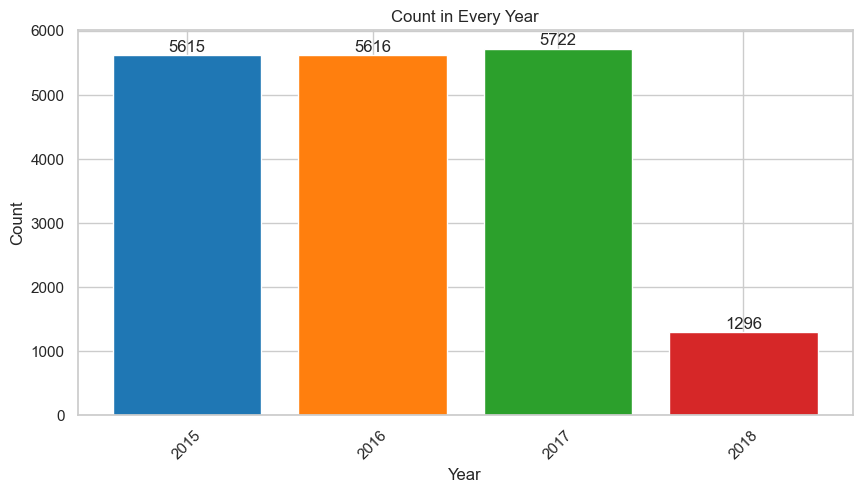

In [28]:
# Display a Bar Chart to indicate the count in every year as shown below
# Calculate the count for each year
year_counts = avocado_df['year'].value_counts().sort_index()  # Sorting by year if necessary

# Create the bar chart
plt.figure(figsize=(10, 5))  # Adjust the size of the figure
bar_chart = plt.bar(year_counts.index.astype(str), year_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Add the title and labels
plt.title('Count in Every Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Rotate x labels if needed (if you have many years and labels overlap)
plt.xticks(rotation=45)

# Optional: Adding the count above the bars
for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom')

# Show the plot
plt.show()


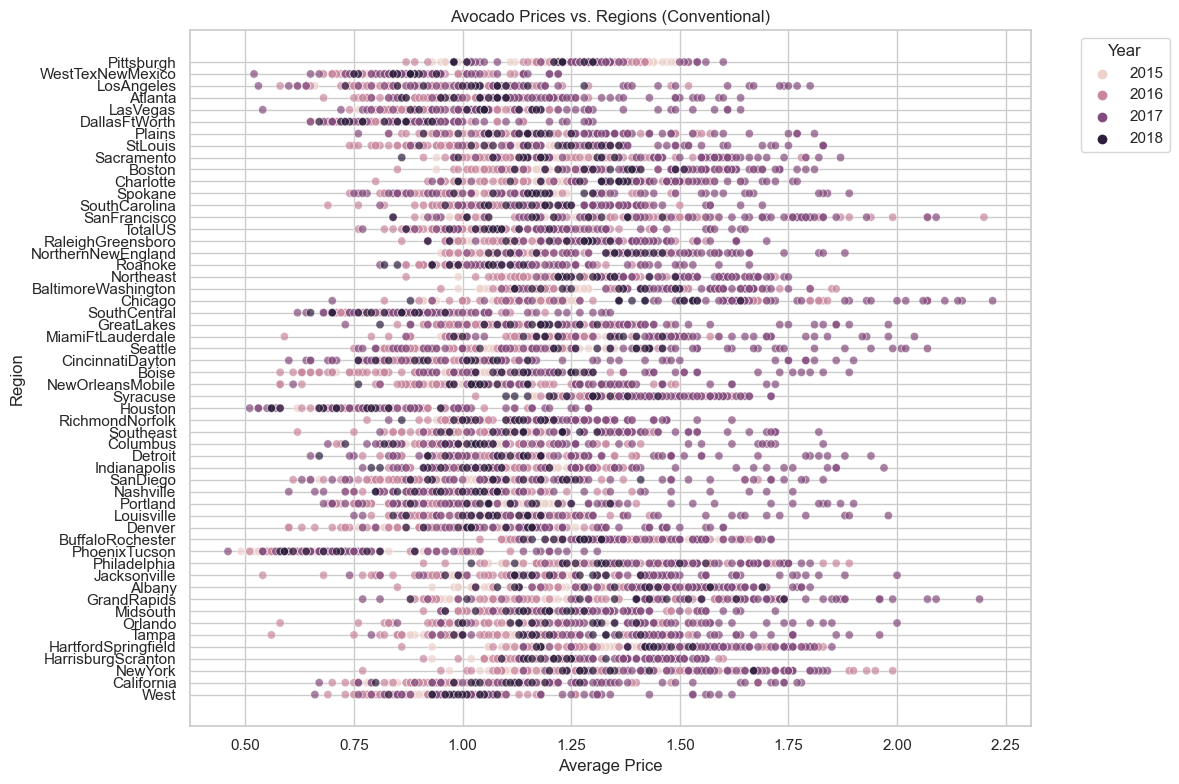

In [29]:
 # Dispaly a plot the avocado prices vs. regions for conventional avocados as shown below
# Filter the data for conventional avocados
conventional_data = avocado_df[avocado_df['type'] == 'conventional']

# Plotting avocado prices versus regions for conventional avocados, categorized by year
plt.figure(figsize=(12, 8))
sns.scatterplot(data=conventional_data, x='AveragePrice', y='region', hue='year', alpha=0.7)
plt.title('Avocado Prices vs. Regions (Conventional)')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
# Prepare and Print out the dataset as shown below
result_df=avocado_df[['Date', 'AveragePrice']]
result_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [31]:
# Transform and display the dataset as shown below readying it to use the facebook prophet
prophet_df = result_df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# Display the transformed dataset
prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


![image.png](images/2.png)

![image.png](images/3.png)

![image.png](images/4.png)

# Part 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [57]:
# Develop the facebook prophet model here and fit it into the dataset
# Initialize the Prophet model
model = Prophet()

# Fit the model with the dataset
model.fit(prophet_df)


00:39:26 - cmdstanpy - INFO - Chain [1] start processing
00:39:28 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
# Forcasting into the future using the model you created above
# Create a future DataFrame for the next 365 days
future = model.make_future_dataframe(periods=365)

# Use the model to make a forecast
forecast = model.predict(future)


In [60]:
# Display the last few rows of the forecast dataframe to see the predictions
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498517,0.905836,1.872241,1.498517,1.498517,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,0.0,0.0,0.0,1.384815
1,2015-01-11,1.493341,0.884890,1.882148,1.493341,1.493341,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,0.0,0.0,0.0,1.388067
2,2015-01-18,1.488165,0.876690,1.859582,1.488165,1.488165,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,0.0,0.0,0.0,1.383211
3,2015-01-25,1.482990,0.897102,1.849515,1.482990,1.482990,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,0.0,0.0,0.0,1.359070
4,2015-02-01,1.477814,0.839923,1.809717,1.477814,1.477814,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,0.0,0.0,0.0,1.325521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167515,0.563251,1.638778,0.987720,1.350054,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,0.0,0.0,0.0,1.081039
530,2019-03-22,1.166795,0.600107,1.594633,0.986022,1.350158,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,0.0,0.0,0.0,1.082013
531,2019-03-23,1.166076,0.555118,1.580983,0.984354,1.350442,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,0.0,0.0,0.0,1.083263
532,2019-03-24,1.165356,0.553328,1.593277,0.983076,1.351706,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,0.0,0.0,0.0,1.084768


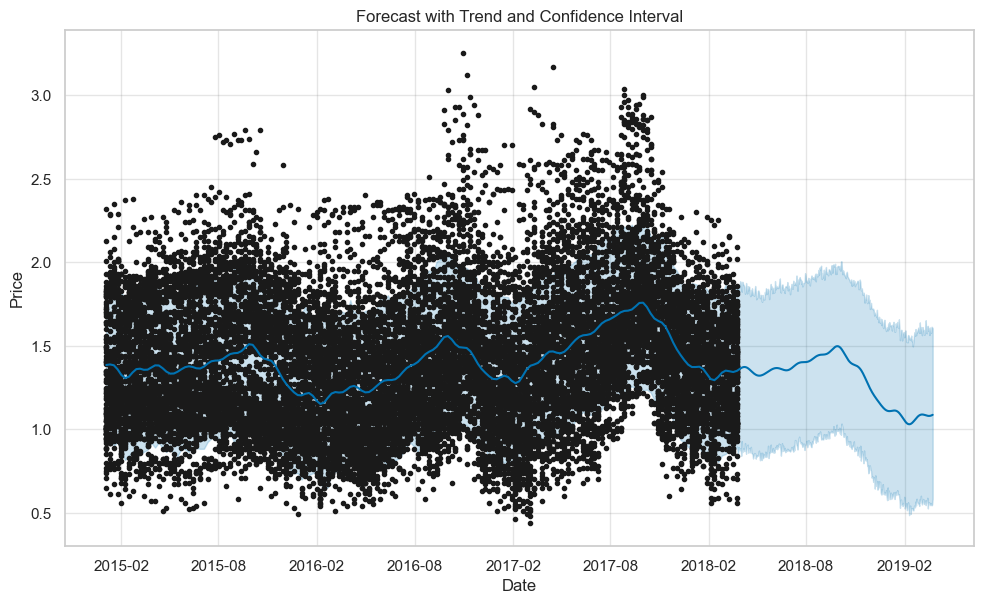

In [38]:
# Print the below plot

fig = model.plot(forecast)
plt.title('Forecast with Trend and Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

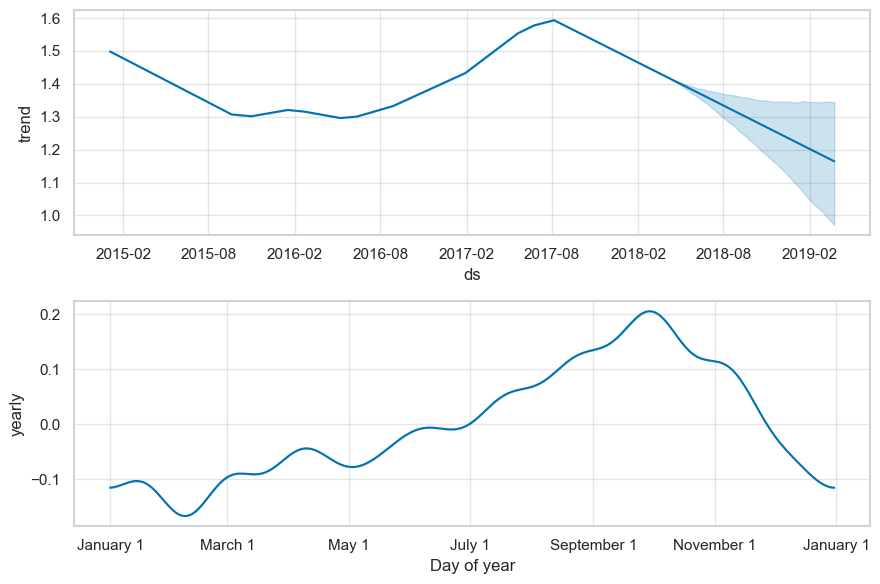

In [39]:
# Display the trend, yearly and weekly components as shown below
# Display the trend and yearly components of the forecast
fig = model.plot_components(forecast)

# You can save the figure if needed
plt.show()

In [40]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')

In [41]:
# Using the original dataset, Select and create a dataframe for West region
west_df = avocado_df[avocado_df['region'] == 'West']

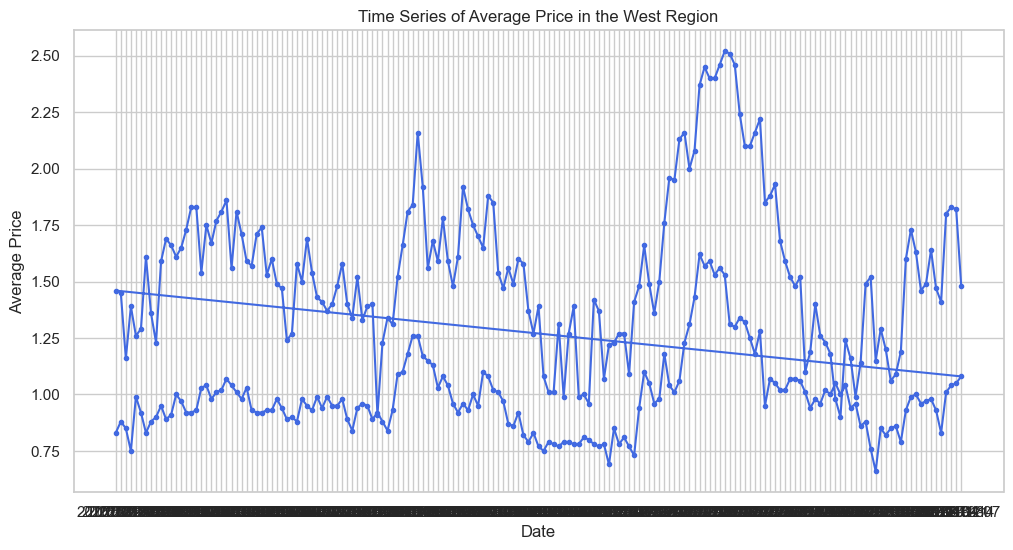

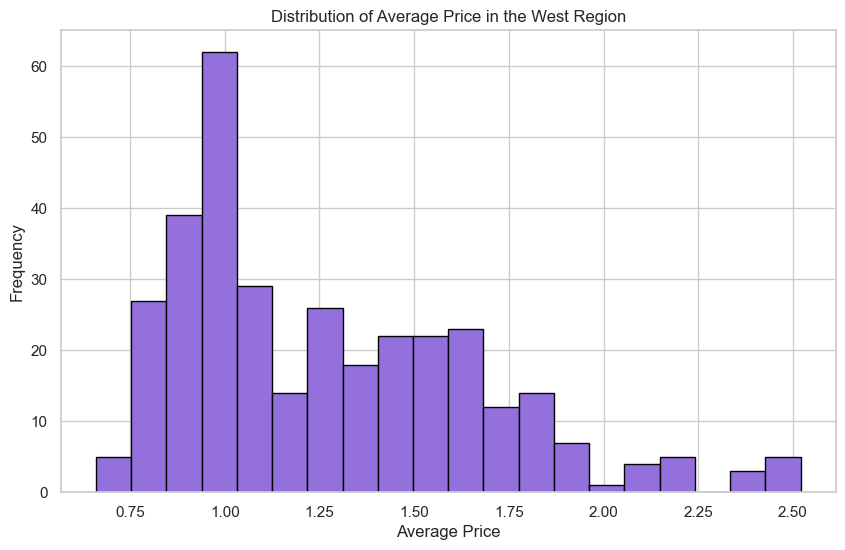

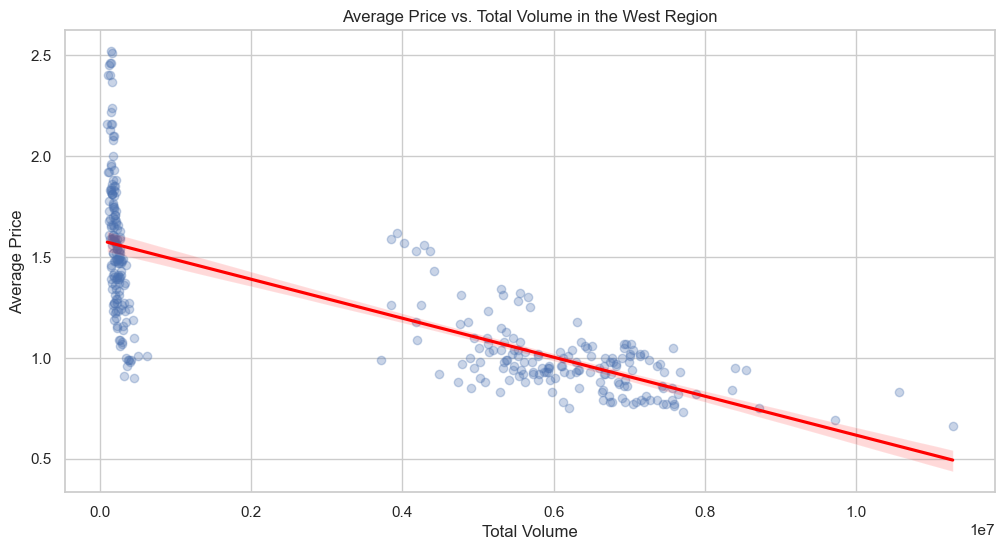

In [73]:
# Prepare and display the below plots using the West region dataframe
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(west_df['ds'], west_df['y'], marker='.', linestyle='-', color='royalblue')
plt.title('Time Series of Average Price in the West Region')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(west_df['y'], bins=20, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Average Price in the West Region')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot with Trend Line
# Ensure 'Total Volume' is also a column in west_df
plt.figure(figsize=(12, 6))
sns.regplot(x='Total Volume', y='y', data=west_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Average Price vs. Total Volume in the West Region')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

In [53]:
# convert the dataframe into facebook prophet format and display it as shown below

# Convert the DataFrame into Prophet's expected format.
avocado_df_prophet = avocado_df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# Display the DataFrame
avocado_df_prophet

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [61]:
# create the facebook prophet model, fit it into the dataset and create future forecast


# Initialize the Prophet model
model = Prophet()

# Fit the model with the dataframe
model.fit(west_df_prophet)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)

# Predict future values
forecast = model.predict(future)



00:44:53 - cmdstanpy - INFO - Chain [1] start processing
00:44:53 - cmdstanpy - INFO - Chain [1] done processing


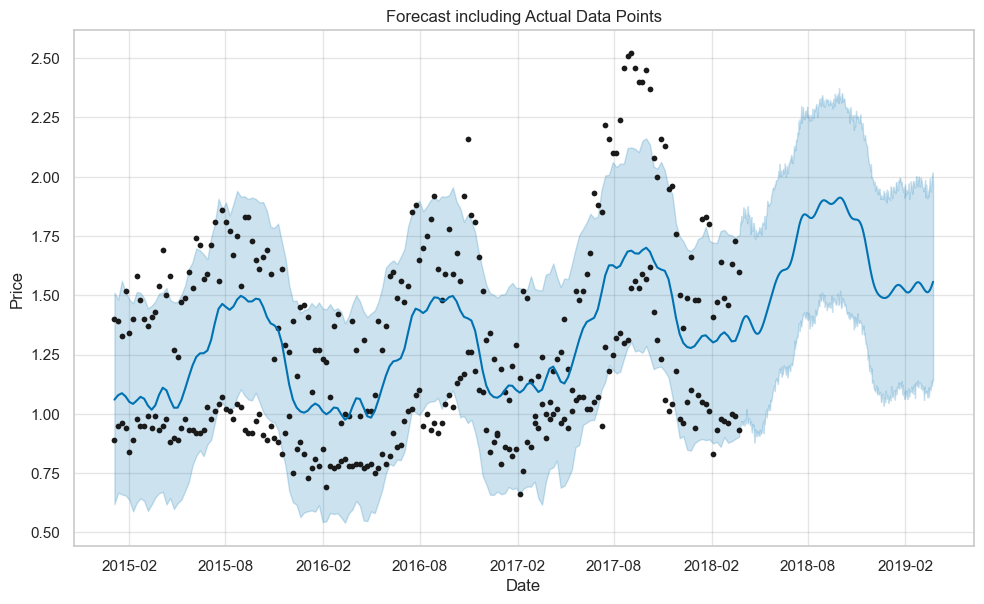

In [62]:
# Create and Diplay the below plot
# Plot the forecast
fig = model.plot(forecast)

# Scatter plot to show the actual data points
plt.scatter(west_df_prophet['ds'], west_df_prophet['y'], color='black', marker='.', alpha=0.5)

plt.title('Forecast including Actual Data Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

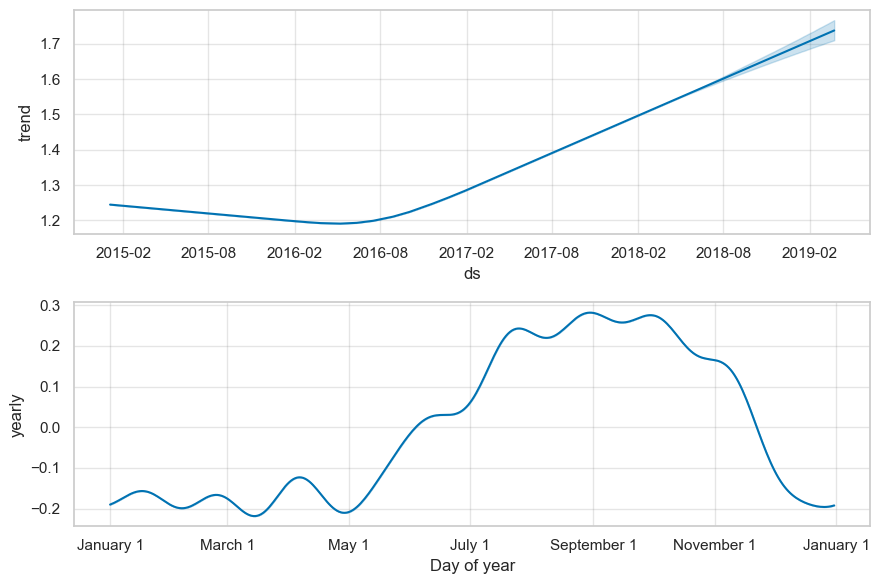

In [67]:
# Display the trend, yearly and weekly components for the Western region as shown below
# Plot the forecast components
fig2 = model.plot_components(forecast)

